# Notebook for general EDA

## Data Loading

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import os
import random
from tqdm import tqdm
import os
from PIL import Image
from sklearn.model_selection import train_test_split

(-0.5, 599.5, 599.5, -0.5)

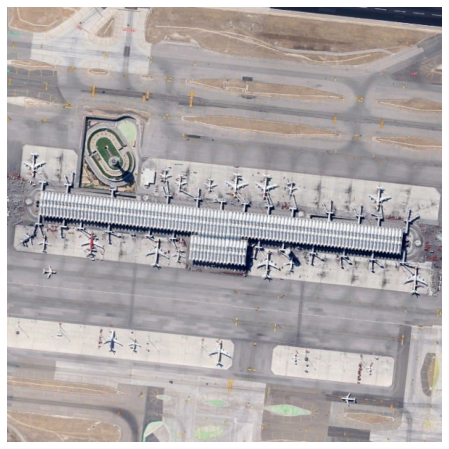

In [3]:
img = plt.imread('data/Airport/airport_1.jpg')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.imshow(img)
ax.axis('off')

In [3]:
def get_random_pics_by_class(data_dir):
    dict_imgs = {}
    for cl in os.listdir(data_dir):
        f = random.choice(os.listdir(os.path.join(data_dir,cl)))
        # print(os.path.join(data_dir, cl, f))
        dict_imgs[cl] = plt.imread(os.path.join(data_dir, cl, f))

    num_classes = len(dict_imgs.keys())
    fig, axes = plt.subplots(nrows=num_classes//3, ncols=3, figsize=(8,num_classes))
    for i, cl in enumerate(dict_imgs.keys()):
        axes[i//3,i%3].imshow(dict_imgs[cl])
        axes[i//3,i%3].axis('off')
        axes[i//3,i%3].set_title(cl)

    plt.show()

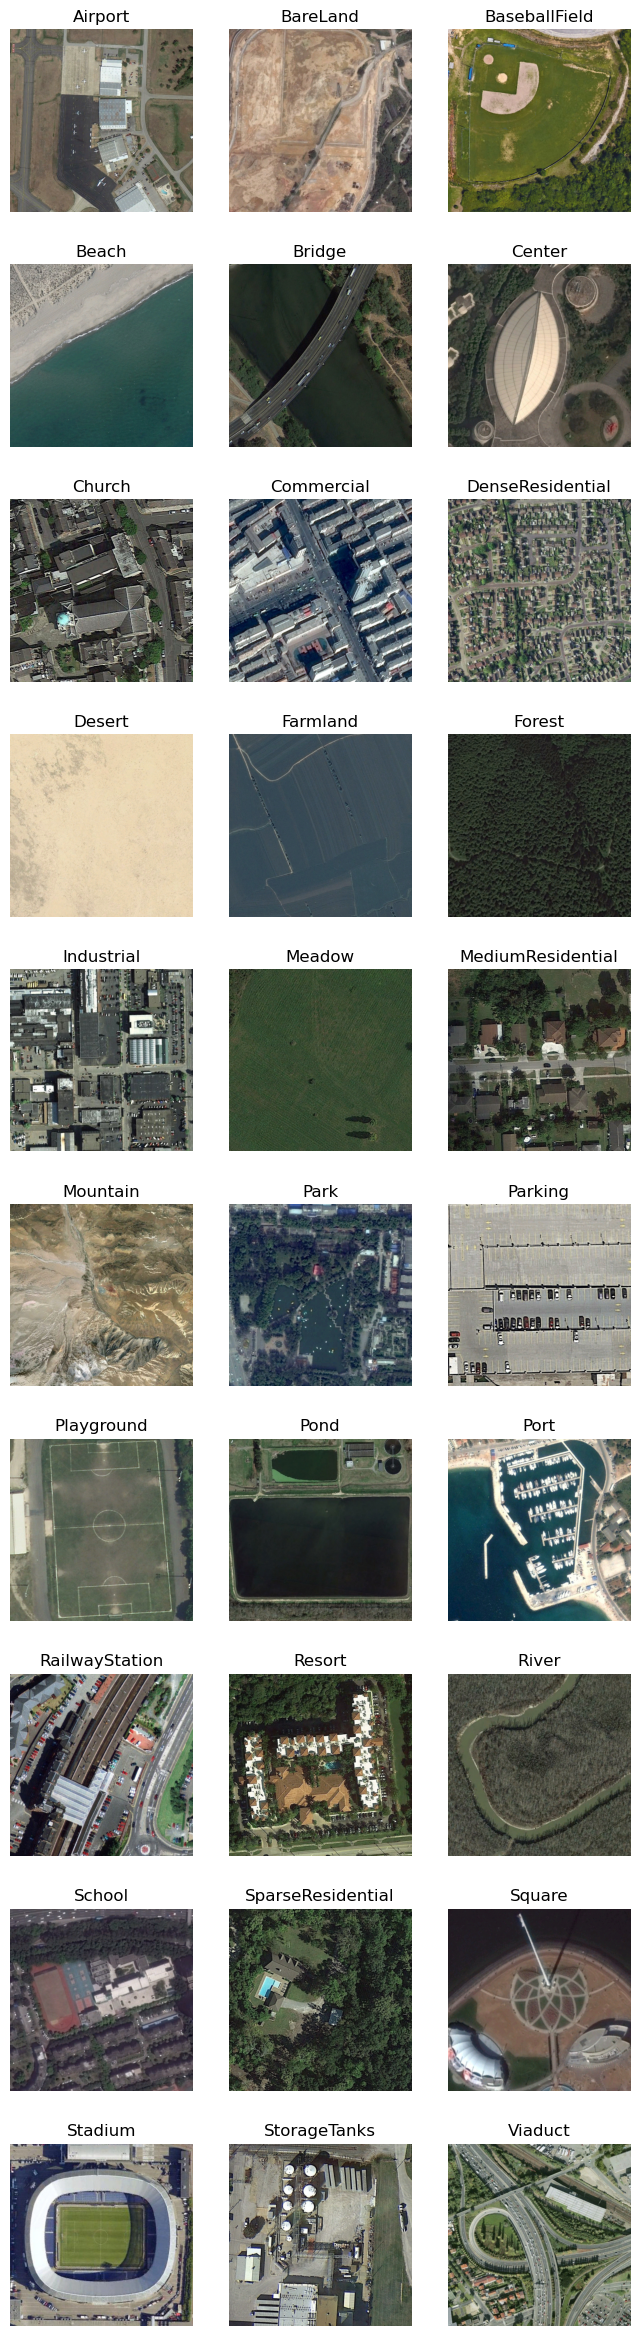

In [4]:
get_random_pics_by_class('data')

In [2]:
# Load in categories & images
directory = 'data'

indx=0
images = []
#images_mini = []

y = pd.DataFrame(columns = ['id_code', 'category'])
#y_mini = []

for filename in os.listdir(directory):
    if filename.startswith('.'):
        next
    else:
        label = filename
        scene_directory = directory + '/' + filename + '/'
        for idx, picname in enumerate(os.listdir(scene_directory)):
            if picname.startswith('.'):
                next
            else:
                # Load Category into Y Dataframe
                y.loc[len(y.index)] = [picname.replace('.jpg', ''),label] 
                
                #Add label to y_mini
                #y_mini.append(label)
                
                # Load Photos
                img = plt.imread(scene_directory + picname)
                
                # Add  into images list
                images.append(img)

                # transform image to array
                img = np.array(img)

                # append to images_mini
                #images_mini.append(img)
                
                next
    


In [24]:
print(len(images))  # 10,000
print(len(y))  #10,000

10000
10000


In [ ]:
#print(type(images_mini))

<class 'list'>


In [15]:
'''
# Flatten minis
images_mini = np.stack(images_mini)
y_mini = np.array(y_mini).flatten() 

print(f"images_mini shape {images_mini.shape}")
print(f"y_mini shape {y_mini.shape}")
'''

NameError: name 'images_mini' is not defined

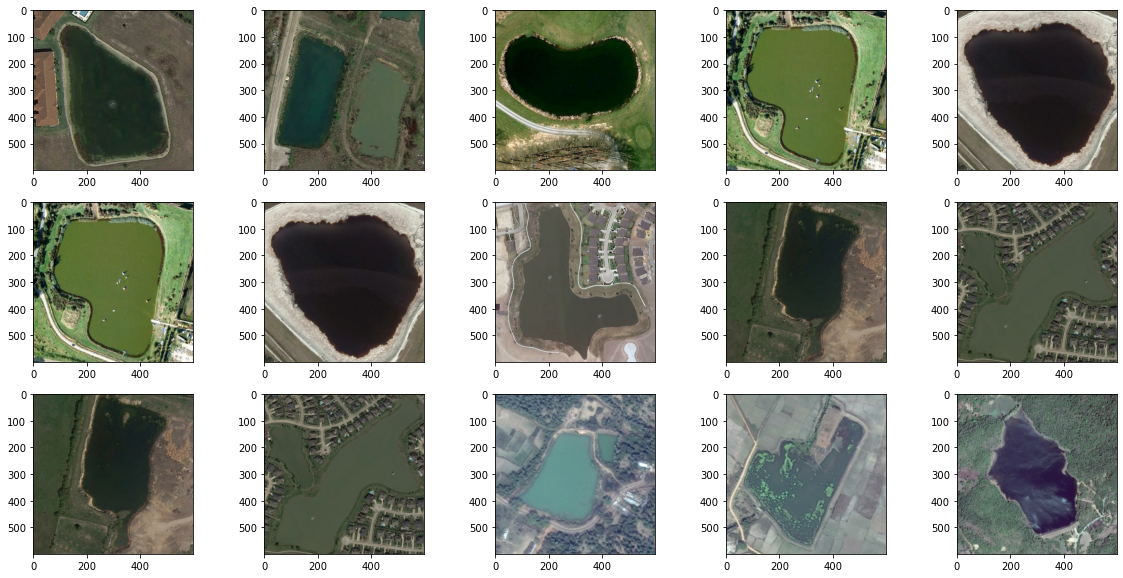

In [23]:
#Check that images look correct!
nrows, ncols = 3,5 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        indx = i*nrows+j
        axs[i,j].imshow(images[indx])


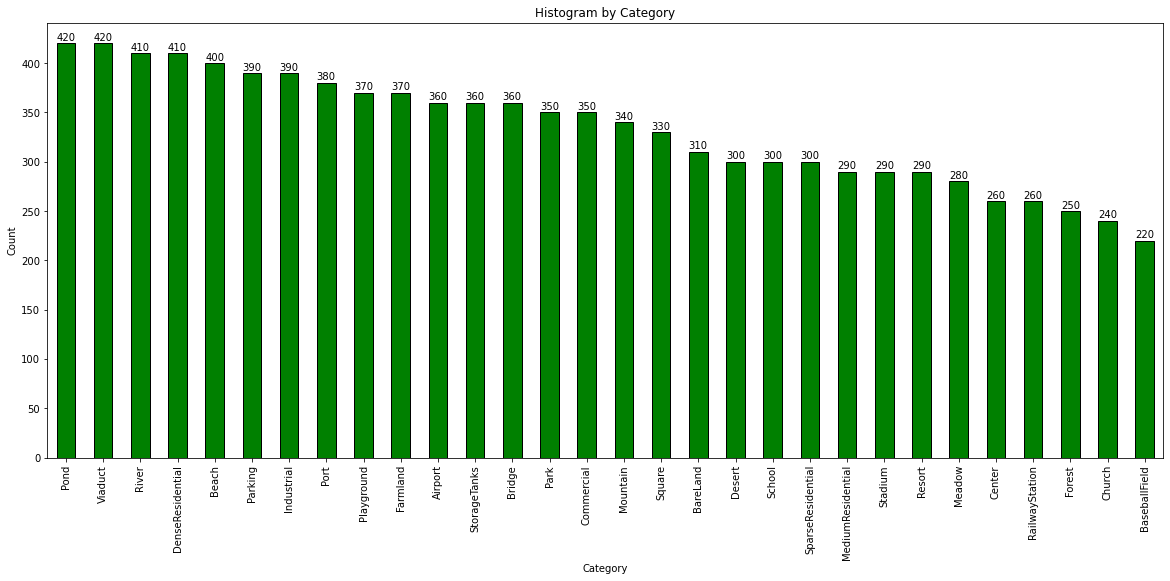

In [34]:
# plot histogram of types

plt.figure(figsize=(20, 8))
counts = y['category'].value_counts()
ax = counts.plot(kind='bar', color='green', edgecolor='black')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram by Category')

# Adding values on top of each bar
for i, value in enumerate(counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.show()

#### Data cutting and pre-processing

In [3]:
# function to pick random images for correct sizing (Simplifying Yencheng's code)
def pick_random_images(scene_type):
    data_cut = y[y["category"]==scene_type]
    temp = list(np.random.choice(
    data_cut.id_code,
    size=100,
    replace=False
    ))
    return temp


In [26]:
# scenes = y['category'].unique().tolist()
# result_dict = {}

# for i in scenes:
#   print(f'{i} = pick_random_images("{i}")')

# scenes = y['category'].unique().tolist()
# result_dict = {}

# for i in scenes:
#   print(f'{i}+')

In [22]:
print(Airport)

['airport_233', 'airport_321', 'airport_332', 'airport_90', 'airport_119', 'airport_280', 'airport_356', 'airport_96', 'airport_301', 'airport_216', 'airport_127', 'airport_122', 'airport_323', 'airport_294', 'airport_272', 'airport_78', 'airport_204', 'airport_144', 'airport_315', 'airport_148', 'airport_61', 'airport_133', 'airport_238', 'airport_289', 'airport_313', 'airport_177', 'airport_270', 'airport_198', 'airport_223', 'airport_152', 'airport_221', 'airport_56', 'airport_6', 'airport_65', 'airport_296', 'airport_138', 'airport_222', 'airport_343', 'airport_107', 'airport_151', 'airport_279', 'airport_178', 'airport_237', 'airport_268', 'airport_246', 'airport_105', 'airport_243', 'airport_320', 'airport_46', 'airport_55', 'airport_274', 'airport_283', 'airport_159', 'airport_348', 'airport_166', 'airport_240', 'airport_23', 'airport_340', 'airport_82', 'airport_173', 'airport_219', 'airport_104', 'airport_172', 'airport_87', 'airport_3', 'airport_333', 'airport_58', 'airport_1

In [4]:
# Pick random images from each cloud type
np.random.seed(1234)

Airport = pick_random_images("Airport")
BareLand = pick_random_images("BareLand")
BaseballField = pick_random_images("BaseballField")
Beach = pick_random_images("Beach")
Bridge = pick_random_images("Bridge")
Center = pick_random_images("Center")
Church = pick_random_images("Church")
Commercial = pick_random_images("Commercial")
DenseResidential = pick_random_images("DenseResidential")
Desert = pick_random_images("Desert")
Farmland = pick_random_images("Farmland")
Forest = pick_random_images("Forest")
Industrial = pick_random_images("Industrial")
Meadow = pick_random_images("Meadow")
MediumResidential = pick_random_images("MediumResidential")
Mountain = pick_random_images("Mountain")
Park = pick_random_images("Park")
Parking = pick_random_images("Parking")
Playground = pick_random_images("Playground")
Pond = pick_random_images("Pond")
Port = pick_random_images("Port")
RailwayStation = pick_random_images("RailwayStation")
Resort = pick_random_images("Resort")
River = pick_random_images("River")
School = pick_random_images("School")
SparseResidential = pick_random_images("SparseResidential")
Square = pick_random_images("Square")
Stadium = pick_random_images("Stadium")
StorageTanks = pick_random_images("StorageTanks")
Viaduct = pick_random_images("Viaduct")

In [24]:
print(len(scenes), len(y_list), len(df_y))
print(df_y)
print(y_list)
print(y)

30 3000 3000
               id_code      category
4             pond_331          Pond
5             pond_279          Pond
11            pond_292          Pond
13              pond_5          Pond
19             pond_25          Pond
...                ...           ...
9989  storagetanks_356  StorageTanks
9990  storagetanks_183  StorageTanks
9992  storagetanks_168  StorageTanks
9993  storagetanks_140  StorageTanks
9996   storagetanks_10  StorageTanks

[3000 rows x 2 columns]
['pond_279' 'pond_235' 'pond_100' ... 'viaduct_308' 'viaduct_277'
 'viaduct_191']
[]


In [13]:
# Combine all images into a single dataframe
y_list = Pond+ Forest+ River+ Resort+ Playground+ Bridge+ Park+ Center+ Square+ BaseballField+ Church+ Farmland+ Stadium+ \
         Commercial+ Industrial+ Airport+ SparseResidential+ MediumResidential+ DenseResidential+ RailwayStation+ BareLand+\
         Beach+ Port+ Mountain+ Desert+ Meadow+ Parking+ School+ StorageTanks+ Viaduct

y_list = np.array(y_list)

df_y = y[ y["id_code"].isin(y_list) ]

y_index = list(df_y.id_code)

image_sub = []
y_sub = []
for filename in os.listdir(directory):
    if filename == '.DS_Store':
        next
    else:
        label = filename
        scene_directory = directory + '/' + filename + '/'
        for idx, picname in enumerate(os.listdir(scene_directory)):
            #print( idx, picname)
            if picname.replace(".jpg", "") in y_index:
                #if picname.replace(".jpg", "").contains("Cs"):
                
                y_sub.append(picname.replace(".jpg", ""))

                # Load Photos into images list               
                img = plt.imread(scene_directory + picname)
                
                # transform image to array
                img = np.array(img)

                # append to images
                image_sub.append(img)
              
                next
            else:
                next

In [16]:
a = ['xcv1', 'xcv123']
b = ['xcv1', 'xcc']
c = []
for i in a:
    if i in b:
        c.append(i)
print(c)

['xcv1']


In [18]:
print(len(y_sub), len(image_sub))

3000 3000


#### Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(image_sub, y_sub, test_size=0.4, random_state=42)

# Further split the test set into validation and test (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [19]:
def split_data(images, y, split=(0.6,0.2,0.2)):

    splits = np.multiply(len(images), split).astype(int)
    X_train, X_val, X_test = np.split(images, [splits[0], splits[0]+splits[1]])
    y_train, y_val, y_test = np.split(y, [splits[0], splits[0]+splits[1]])

    return X_train, y_train, X_val, y_val, X_test, y_test

In [20]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(
    image_sub,
    y_sub,
    split=(0.6,0.2,0.2)
)

In [61]:

print(len(y_sub), len(image_sub),len(X_train), len(y_train), len(X_val), len(y_val),  len(X_test), len(y_test), )

3000 3000 1800 1800 600 600 600 600


#### print training data examples

Print training data examples:
[  76   58 1225  511  396]
76
resort_127


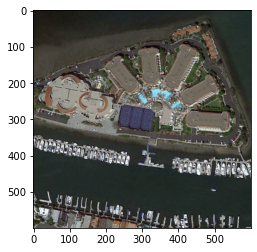

58
commercial_241


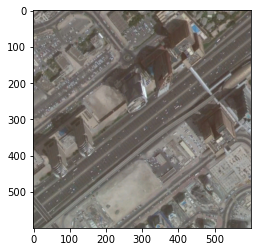

1225
pond_266


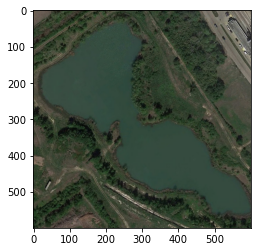

511
viaduct_228


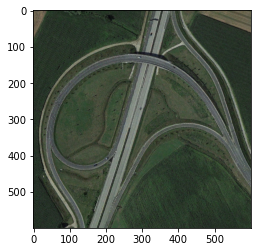

396
denseresidential_77


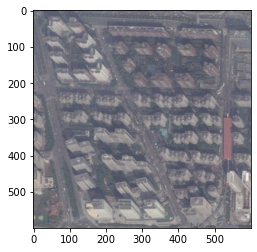

In [73]:
print('Print training data examples:')
nrows, ncols = 1,5 #print first 5 images

validation_indices = np.random.choice(len(X_train), size=5, replace=False)

print(validation_indices)

# Check the content
for i in validation_indices:
    print(i)
    print(y_train[i])
    image_to_show = X_train[i].astype('uint8')

    # Then display the image
    plt.imshow(image_to_show)
    plt.show()


##### Extract features from images

In [109]:
from skimage.color import rgb2gray
from skimage.exposure import rescale_intensity
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [86]:
## should we use gray scale or rgb for HOG?

def image_gray(img):
    
    # convert to floating point image with intensity [0, 1]
    if np.max(img) > 1:
        img = img.astype(np.float32) / 255.0

    # convert to grayscale
    if len(img.shape) > 2:
        img = rgb2gray(img)

    return img

def get_HOG(in_imgs):    
    featurelist = []
    
    for i in range(in_imgs.shape[0]):
        fd, hog_image = hog(in_imgs[i, :, :], orientations=4, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, multichannel=False)
        if i == 0:
          sample_img = hog_image
        featurelist.append(fd[np.newaxis, :])

    return featurelist

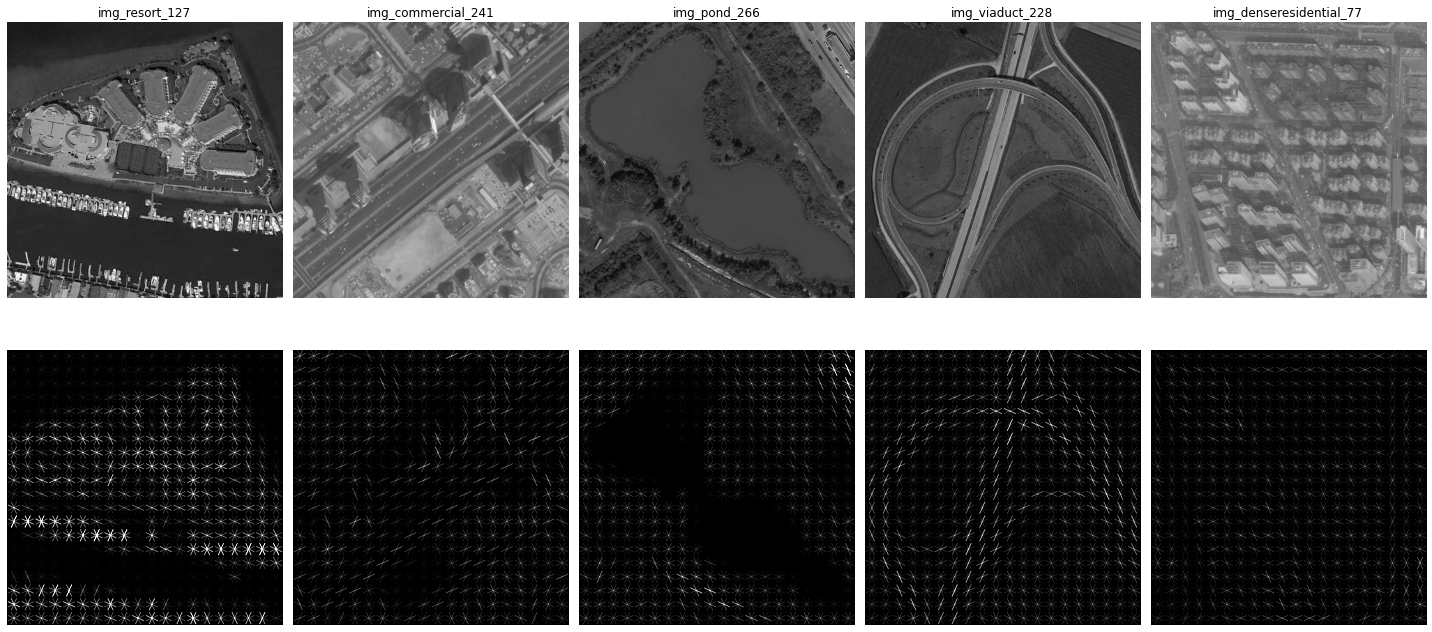

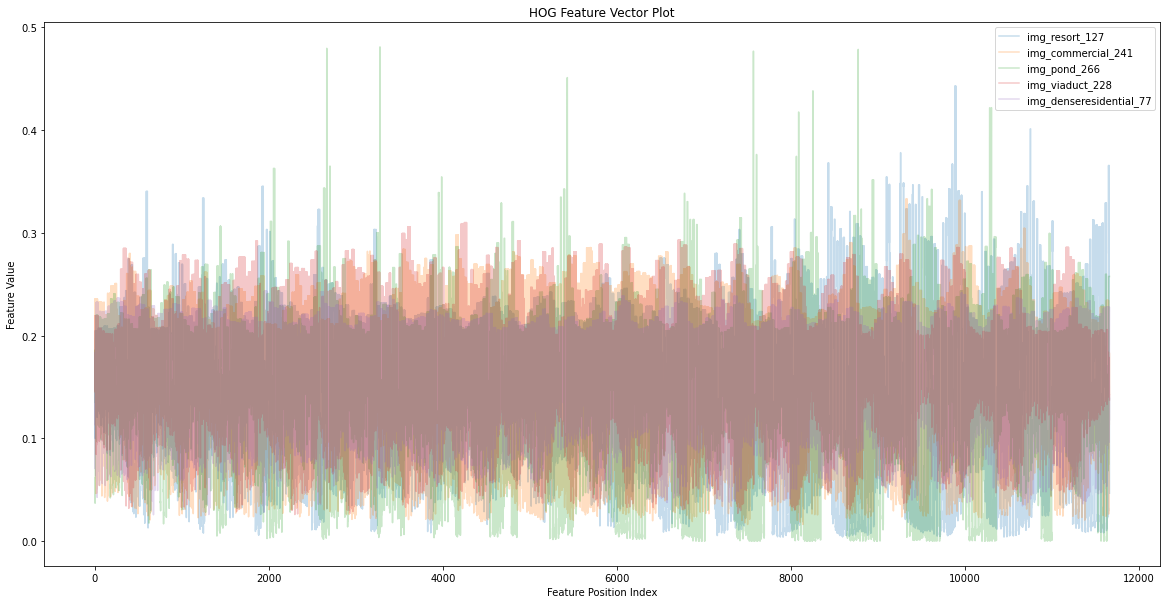

In [107]:

fig, ax = plt.subplots(nrows=2, ncols= 5, figsize=(20,10))
images = []
features = []

for i in range(len(validation_indices)):
  n = validation_indices[i]
  im_processed = image_gray(X_train[n])

  # mean = np.mean(im_processed)
  # std = np.std(im_processed)
  # im_processed = (im_processed - mean) / std

  #im_processed = read_image(impath)
  #if i == 3:
    # im_processed = rotate(im_processed, -90)
    # im_processed = im_processed[:, ::-1]
    
  im_processed = rescale_intensity(im_processed, (0,1))
  images.append(im_processed)
  f, h = hog(im_processed, orientations=4, pixels_per_cell=(30, 30), visualize=True)
  features.append(f)
  ax[0,i].imshow(im_processed, cmap='gray', vmin=0, vmax=1)
  ax[0,i].axis('off')
  ax[0,i].set_title(f'img_{y_train[n]}')
  ax[1,i].imshow(10*h, cmap='gray', vmin=0, vmax=0.5)
  ax[1,i].axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for f in features:
  plt.plot(f, alpha=0.25)
plt.title("HOG Feature Vector Plot")
plt.xlabel("Feature Position Index")
plt.ylabel("Feature Value")
plt.legend([f'img_{y_train[n]}' for n in validation_indices])
plt.show()

#### train classifier

In [113]:
def hog_feat(arr):
  hog_features = []
  for i in range(len(arr)):
    
    im_processed = image_gray(arr[i])

    # mean = np.mean(im_processed)
    # std = np.std(im_processed)
    # im_processed = (im_processed - mean) / std

    #im_processed = read_image(impath)
    #if i == 3:
      # im_processed = rotate(im_processed, -90)
      # im_processed = im_processed[:, ::-1]
      
    im_processed = rescale_intensity(im_processed, (0,1))
    images.append(im_processed)
    f, h = hog(im_processed, orientations=4, pixels_per_cell=(30, 30), visualize=True)
    hog_features.append(f)

  return hog_features

In [115]:
clf = svm.SVC()

hog_train = hog_feat(X_train)

clf.fit(hog_train, y_train)

hog_val = hog_feat(X_val)
y_pred = clf.predict(hog_val)

print("Accuracy: "+str(accuracy_score(y_val, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.0


                       precision    recall  f1-score   support

          airport_122       0.00      0.00      0.00       1.0
          airport_127       0.00      0.00      0.00       1.0
          airport_151       0.00      0.00      0.00       1.0
          airport_164       0.00      0.00      0.00       1.0
          airport_210       0.00      0.00      0.00       1.0
          airport_243       0.00      0.00      0.00       1.0
          airport_294       0.00      0.00      0.00       1.0
          airport_296       0.00      0.00      0.00       1.0
          airport_315       0.00      0.00      0.00       1.0
          airport_320       0.00      0.00      0.00       1.0
          airport_333       0.00      0.00      0.00       1.0
          airport_335       0.00      0.00      0.00       1.0
          airport_339       0.00      0.00      0.00       1.0
           airport_37       0.00      0.00      0.00       1.0
           airport_47       0.00      

/Users/Yencheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Yencheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Yencheng/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Yencheng/op

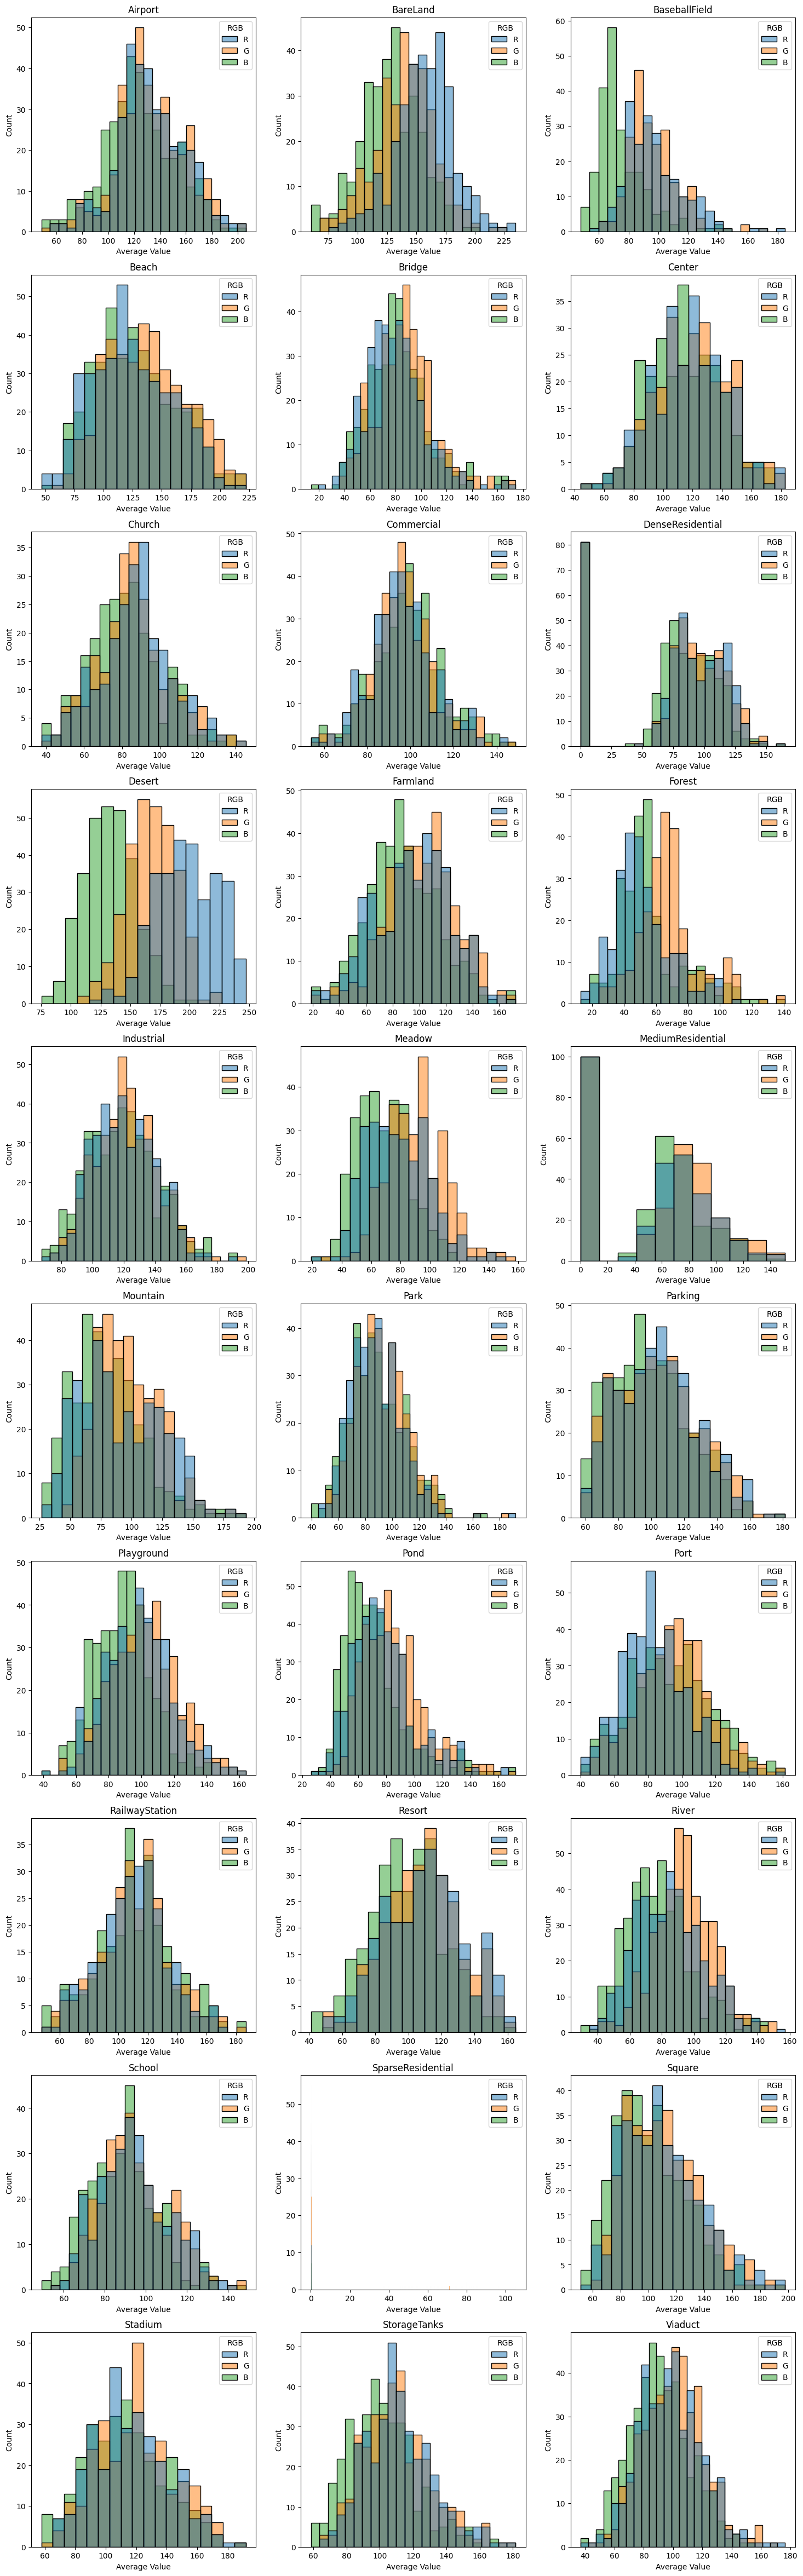

In [ ]:
num_classes = len(rgb_tmp.keys())
fig, axes = plt.subplots(nrows=num_classes//3, ncols=3, figsize=(18,num_classes*2))
for i, cl in enumerate(rgb_tmp.keys()):
    sns.histplot(x='Average Value', hue='RGB', multiple='layer', data=rgb_tmp[cl], ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(cl)
fig.savefig('plots/class_rgb_hist.png')
plt.show()

In [ ]:
rgb_tmp_3d = pd.DataFrame()
for cl in data.keys():
    tmp = pd.DataFrame(np.array([x.mean(axis=(0,1)) for x in data[cl]]), columns=['R','G','B'])
    tmp['class'] = cl
    rgb_tmp_3d = pd.concat([rgb_tmp_3d, tmp], axis=0)

rgb_tmp_3d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 419
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       10000 non-null  float64
 1   G       10000 non-null  float64
 2   B       10000 non-null  float64
 3   class   10000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 390.6+ KB


In [ ]:
fig = px.scatter_3d(rgb_tmp_3d, x='R', y='G', z='B', color='class', width=800, height=800)
fig.update_traces(marker_size = 6)
fig.write_html('plots/class_scatter.html')
fig.show()